In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [26]:
diabetes_df = pd.read_csv("/content/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.isnull().sum().sum()

652

# Imputación por media

In [ ]:
diabetes_df.Glucose.isnull().sum()

In [ ]:
sorted_df = diabetes_df.sort_values(by=["Glucose"], ascending=False)
sorted_df

In [ ]:
sorted_df["Glucose"].mean()

In [ ]:
diabetes_glucose_df = diabetes_df.copy(deep=True)
diabetes_glucose_df

In [ ]:
diabetes_glucose_df["Glucose"] = diabetes_glucose_df["Glucose"].fillna(sorted_df["Glucose"].mean())
sorted_glocose_df = diabetes_glucose_df.sort_values(by=["Glucose"], ascending=False)
sorted_glocose_df

In [24]:
# Antes de la imputación: 121.6867627785059
sorted_glocose_df["Glucose"].mean()

121.68676277850591

# Imputación por mediana

In [34]:
diabetes_df["Glucose"].median()

117.0

In [ ]:
diabetes_glucose_median_df = diabetes_df.copy(deep=True)

diabetes_glucose_median_df["Glucose"] = diabetes_glucose_median_df["Glucose"].fillna(sorted_df["Glucose"].median())

sorted_glucose_median_df = diabetes_glucose_median_df.sort_values(by=["Glucose"], ascending=False)
sorted_glucose_median_df

In [36]:
diabetes_glucose_median_df["Glucose"].median()

117.0

# Imputación por Bfill y Ffill (Llenado hacia adelante y llenado hacia atras)

In [ ]:
diabetes_df.SkinThickness.isnull().sum()

In [ ]:
diabetes_df.SkinThickness.head(4)

In [ ]:
diabetes_df.SkinThickness.bfill().head(4)

In [ ]:
diabetes_df.SkinThickness.ffill().head(4)

In [ ]:
sorted_skin_thickness = diabetes_df.sort_values(by=["Age"], ascending=True)
sorted_skin_thickness.SkinThickness

In [ ]:
sorted_skin_thickness.SkinThickness.ffill()

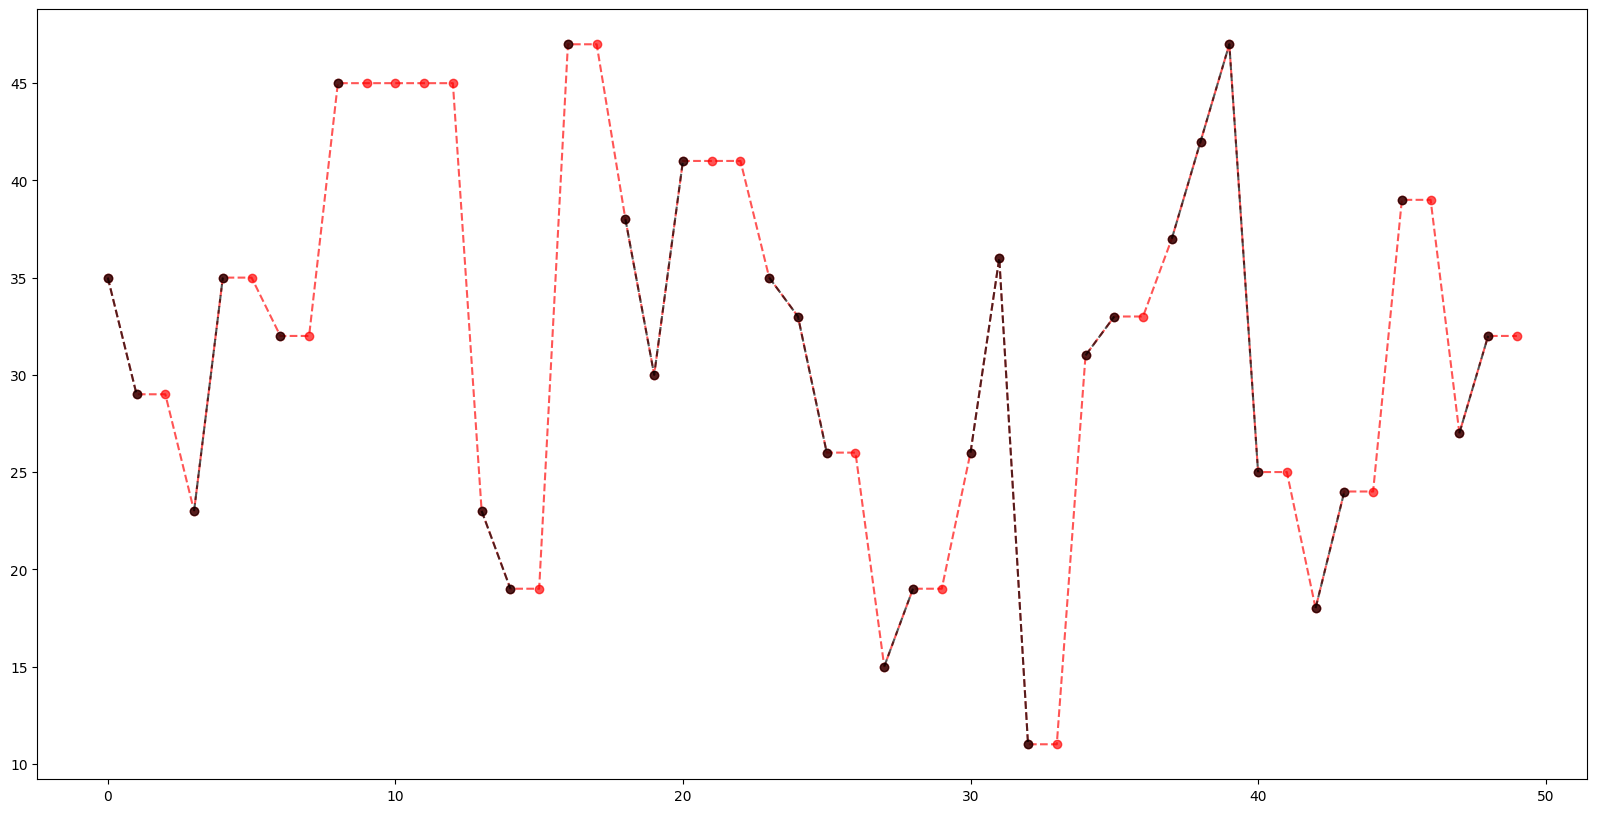

In [65]:
plt.figure(figsize=(20,10))
diabetes_df.SkinThickness.head(50).ffill().plot(color="red", marker="o", alpha=6/9, linestyle="dashed")
diabetes_df.SkinThickness.head(50).plot(color="black", marker="o", alpha=6/9, linestyle="dashed")
plt.show()

# Imputación por interpolación

In [63]:
sorted_insulin_df = diabetes_df.copy(deep=True)
sorted_insulin_df.Insulin.isnull().sum()

374

In [ ]:
plt.figure(figsize=(20,10))
diabetes_df.Insulin.head(50).interpolate(method="linear").plot(color="red", marker="o", alpha=6/9, linestyle="dashed")
diabetes_df.Insulin.head(50).plot(color="black", marker="o", alpha=6/9, linestyle="dashed")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
diabetes_df.Insulin.head(50).interpolate(method="quadratic").plot(color="red", marker="o", alpha=6/9, linestyle="dashed")
diabetes_df.Insulin.head(50).plot(color="black", marker="o", alpha=6/9, linestyle="dashed")
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
diabetes_df.Insulin.head(50).interpolate(method="nearest").plot(color="red", marker="o", alpha=6/9, linestyle="dashed")
diabetes_df.Insulin.head(50).plot(color="black", marker="o", alpha=6/9, linestyle="dashed")
plt.show()